In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

# Задание
1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

### 1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Изначльно столбец с классами добавил внутрь ДФ и тренировал модель задавая отдельные столбцы ДФ. 
При сравнении тестовых пооказателей с предсказаниями получил значения NaN. В итоге, выделил значения класса в отдельный список. Все ок. 

======================================
Так было изначально 
Можно было бы откатиться назад и задать результат variety отдельным списком 
Просто попробуем будет ли работать код, если все показатели внутри ДФ. по идее, проблем быть не должно

###  2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety

In [4]:
# Создадим ДФ, в котором по изначальному названию оставим только 2 столбца 
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)[['sepal length (cm)', 'sepal width (cm)']]
# Зададим новые названия для оставленных столбцов
df_iris.columns = ['sepal_length', 'sepal_width']
# Добавим столбец с классами из iris target
#df_iris['variety'] = iris.target # вот тут добавлял значения класс в ДФ сразу. Отказался от этой идеи
# Задаем отдельный список с классами ирисов
iris_class = iris.target
# Посмотрим на хвост ДФ
df_iris.tail().T #транспонируем резульат (потому, что захотелось... Визуально, так кажется удобнее смотреть на цифры)

,145,146,147,148,149
sepal_length,6.7,6.3,6.5,6.2,5.9
sepal_width,3.0,2.5,3.0,3.4,3.0


### 3. Разделите данные на выборку для обучения и тестирования

In [5]:
from sklearn.model_selection import train_test_split
# Наши показатели класса внутри датасета. (X, y)
X_train, X_test, y_train, y_test = train_test_split(df_iris, iris_class, test_size=0.25)
# Отдаем под тест 25% а на треннировку оставляем 70%. Судя по хвосту, у нас 150 значений всего. 

In [6]:
# Посчитаем тестовую выборку 
len(y_test)

38

### 4. Постройте модель LDA

In [7]:
# Импортируем модель LDA из sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [8]:
# Зададим LDA
lda = LinearDiscriminantAnalysis()

In [9]:
# Обучим модель
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [10]:
# Делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 1, 1, 0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 1, 2, 2, 0, 0, 1, 0, 0, 2,
       2, 2, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 1, 2, 2])

In [11]:
y_test

array([1, 1, 1, 0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 1,
       1, 2, 1, 2, 2, 1, 1, 0, 1, 2, 1, 1, 0, 0, 2, 2])

In [12]:
result = pd.DataFrame([y_test, lda.predict(X_test)])
result.T

,0,1
0,1,1
1,1,1
2,1,1
3,0,0
4,0,0
5,0,0
6,2,2
7,0,0
8,0,0
9,1,1


При просмотре цифр получаем достаточно большое кол-во ошибок. 

Кажется, что 2 показателя - мало. 

Посчитаем точность модели. 

In [13]:
# расчет точности - отношение верных прогнозов к общему кол-ву позиций
# Является хорошей метрикой для сбалансированных классов  
# Наблюдений в категориях примерно одинаковое кол-во 

# В этой библиотеке скрыты различные метрики качества моделей 
from sklearn.metrics import accuracy_score

# метрика качества модели
accuracy_score(y_test, lda.predict(X_test))

0.8157894736842105

В 81% случаев наша модель верно предсказывает результат классификации.
Хороший результат, учитывая, что мы отбросили часть данных, как было указано в задании. 

In [14]:
# Коэф дискриминантных линий
lda.coef_

array([[-5.90344832,  9.09448061],
       [ 1.75936   , -4.60846484],
       [ 3.92124969, -4.37998783]])

Сначала удивился, что у так мало значений в дискриминантных линиях. Потом вспомнил, что у нас всего 3 группы и мы рассматриваем 2 параметра

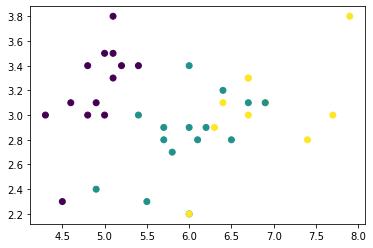

In [15]:
# Визуализируем дискриминантную линию
plt.scatter(x=X_test['sepal_length'], y=X_test['sepal_width'], c=y_test)
plt.show()
# Параметр c - это color , который на вход принимает набор категорий и расскрасит их соответствующим образом 

Достаточно хорошо была отделена 1 категория. Визуально, может показаться, что данные 2 категорий очень сильно перемешаны. 
Вместе с тем, сравнивая тестовые данные и данные обученной модели мы понимаем, что не можем просто визуально разделить категории. И результат скорринга тестовой модели это подтверждает

In [16]:
# Посмотрим на центроиды 
lda.means_

array([[5.04054054, 3.5027027 ],
       [5.91428571, 2.74285714],
       [6.5175    , 2.955     ]])

### 5. Визуализируем предсказания для тестовой выборки и центры классов

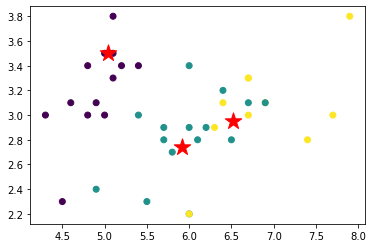

In [17]:
# сам скаттерплот
plt.scatter(x=X_test['sepal_length'], y=X_test['sepal_width'], c=y_test)
# Центроиды (сделаем большие звездочки s = 300 )
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=300, marker='*')

### Краткие выводы:

Невзирая на полученные центры классов и расстояния до них, обучаемая модель исходила, также из набора тренировочных данных. 

Визуально оценивать второй и третий кластер не имеет смысла. 
Первый кластер отлично отделен. 

Модель, построеная на усеченном наборе данных способна хорошо кластеризовать цветки ириса на кластер 1 и остальные. Что, в целом, уже хороший результат

### 6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width

**Отбрасывать целевую переменную нет необходимости. В df_iris ее нет**

### 7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [18]:
# Импортируем KMeans
from sklearn.cluster import KMeans
# Импортируем модель кластеризации 
from sklearn.preprocessing import StandardScaler

In [19]:
# Зададим модель 
scaler = StandardScaler()

In [20]:
# Масштабируем данные нашей будущей модели 
# Отбрасывать целевую переменную нет необходимости. В df_iris ее нет
X_scaled = scaler.fit_transform(df_iris)
X_scaled

array([[-0.90068117,  1.01900435],
       [-1.14301691, -0.13197948],
       [-1.38535265,  0.32841405],
       [-1.50652052,  0.09821729],
       [-1.02184904,  1.24920112],
       [-0.53717756,  1.93979142],
       [-1.50652052,  0.78880759],
       [-1.02184904,  0.78880759],
       [-1.74885626, -0.36217625],
       [-1.14301691,  0.09821729],
       [-0.53717756,  1.47939788],
       [-1.26418478,  0.78880759],
       [-1.26418478, -0.13197948],
       [-1.87002413, -0.13197948],
       [-0.05250608,  2.16998818],
       [-0.17367395,  3.09077525],
       [-0.53717756,  1.93979142],
       [-0.90068117,  1.01900435],
       [-0.17367395,  1.70959465],
       [-0.90068117,  1.70959465],
       [-0.53717756,  0.78880759],
       [-0.90068117,  1.47939788],
       [-1.50652052,  1.24920112],
       [-0.90068117,  0.55861082],
       [-1.26418478,  0.78880759],
       [-1.02184904, -0.13197948],
       [-1.02184904,  0.78880759],
       [-0.7795133 ,  1.01900435],
       [-0.7795133 ,

In [21]:
# Стриом график локтя  
# Создаем список для инерции 
k_inertia = []
# задаем диапазон кластеров. Задаем максимум 10 кластеров (будет удобнее читать визуализацию) 
ks = range(1, 10)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
#     добавляем инерцию каждой модели в список 
    k_inertia.append(clf_kmeans.inertia_)

D:\python a\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


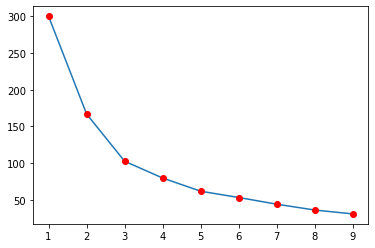

In [22]:
# визуализируем локоть 
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia, 'ro')

Явно видим, что локоть у нас в точке **3-х кластеров**

In [23]:
# задаем кол-во кластеров. В нашем случае 3
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер 
# (сразу же тренируем и присваиваем, так как нет никаких отдельных тренировочных данных)
clusters = kmeans.fit_predict(X_scaled)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

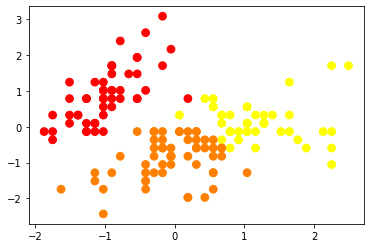

In [24]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

### Краткие выводы: 
Визуально получаем более "корректную" с логической точки зрения кластеризацию. Учитывая те данные, которые у нас загружены в модель. 
Вместе с тем, понимаем, что реальная кластеризация выглядит иначе. 
Данных для корректной класстеризации ДФ недостаточно. 

# Сравним кластеризацию по модели с изначально указанными данными (просто по фану)
Весь код и изыскания представленные ниже не являются частью домашнего задания и представлены исключительно в качестве свободного эксперимента

In [25]:
accuracy_score(iris_class, clusters)

0.7666666666666667

In [26]:
iris_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [27]:
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [30]:
accuracy_score(iris_class[50: ], clusters[50: ])

0.66

### Краткие выводы:

Получили точность в 76%  

Вместе с тем, четко понимаем, что данные по кластерам распределены на основании недостаточных данных. Если взять примерно 2/3 ДФ, то видим, что точность модели падает до 66% 

Для более качественных моделей требуется больше параметров. 